# Estimation of CO<sub>2</sub> emissions using linear and tree-based regression models

### Raul Almuzara

----------------

**Task**: Predict the amount of grams of CO<sub>2</sub> per kilometer that a vehicle emits based on various technical characteristics.

**Libraries**

In [52]:
#Project carried out in Python 3.9.17 and the following libraries in the following versions:

import numpy as np #version 1.24.3
import pandas as pd #version 2.0.1
import matplotlib.pyplot as plt #version 3.7.1
import seaborn as sns #version 0.12.2
from statsmodels.api import OLS, add_constant #version 0.13.5
from sklearn.model_selection import train_test_split #version 1.3.0
from sklearn.metrics import mean_squared_error #version 1.3.0
from sklearn.linear_model import LinearRegression, Ridge #version 1.3.0
from sklearn.tree import DecisionTreeRegressor #version 1.3.0
from sklearn.ensemble import RandomForestRegressor #version 1.3.0
from xgboost import XGBRegressor #version 1.7.6

**Dataset: 2022 Fuel Consumption Ratings**

Fuel consumption ratings and estimated CO<sub>2</sub> emissions for new light-duty vehicles for retail sale in Canada in $2022$.

Data: https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings

This analysis is for vehicles in $2022$, but information for other years can be found at https://search.open.canada.ca/opendata

**Data loading**

In [53]:
data = pd.read_csv('MY2022 Fuel Consumption Ratings.csv', sep=',')

-------------------------------------

# Exploratory data analysis

**First instances**

In [54]:
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


**Basic information**

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

**Number of unique values in each attribute**

In [56]:
data.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

**Distribution of categorical attributes**

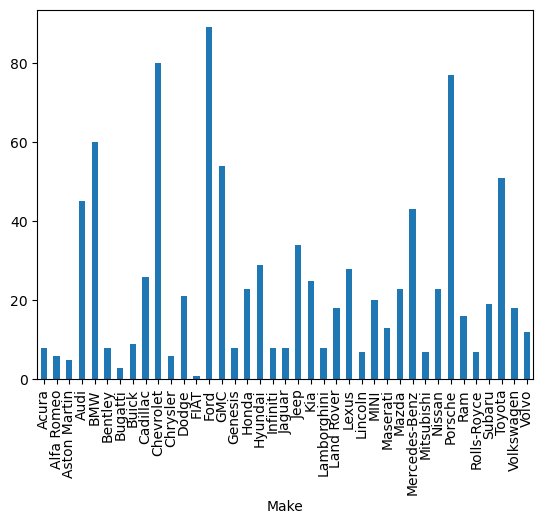

In [57]:
data['Make'].value_counts().sort_index().plot(kind='bar')
plt.show()

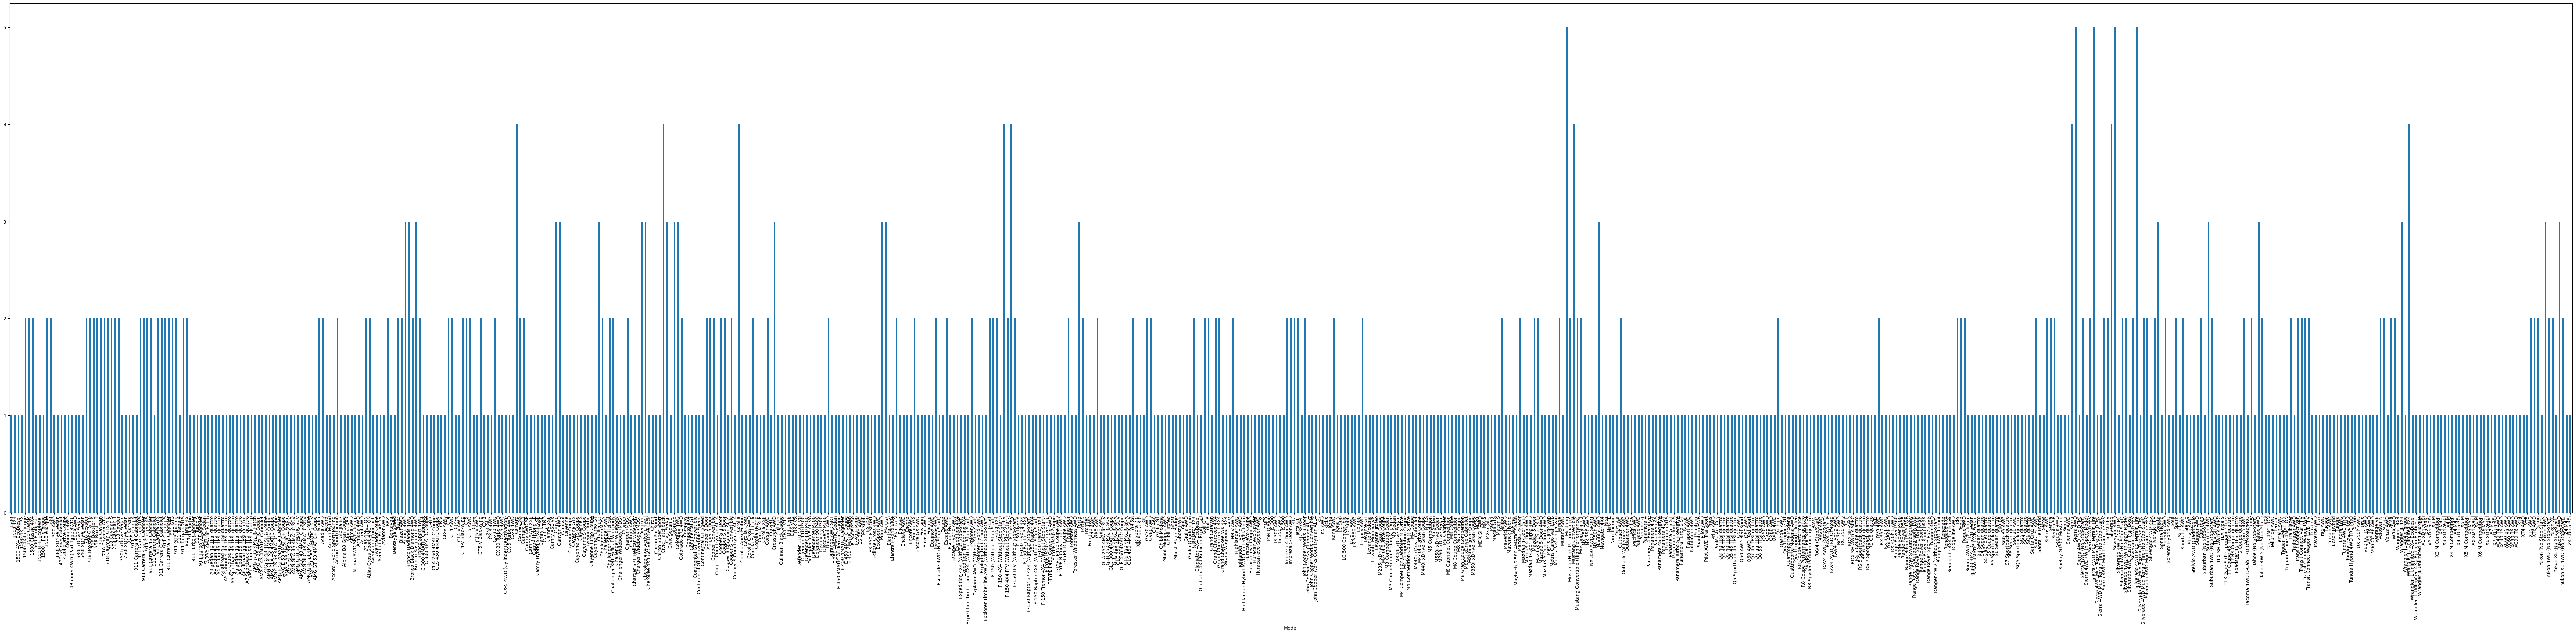

In [58]:
data['Model'].value_counts().sort_index().plot(kind='bar', figsize=(100, 20))
plt.show()

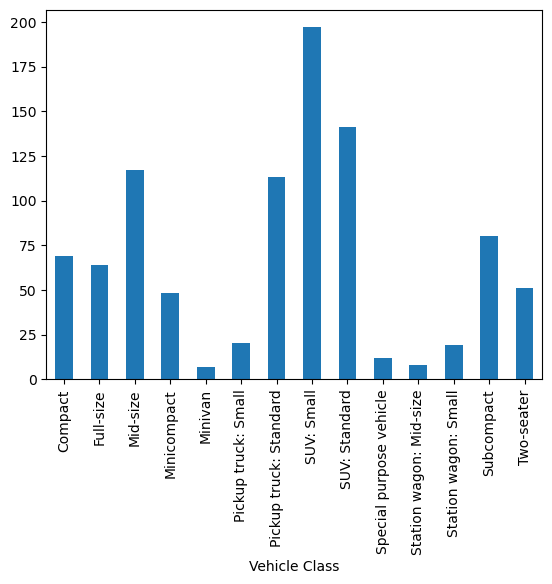

In [59]:
data['Vehicle Class'].value_counts().sort_index().plot(kind='bar')
plt.show()

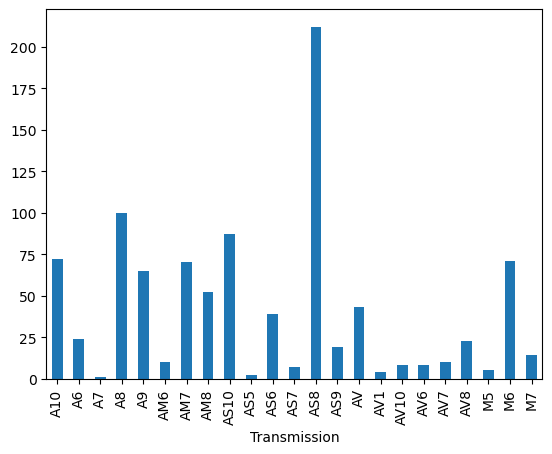

In [60]:
data['Transmission'].value_counts().sort_index().plot(kind='bar')
plt.show()

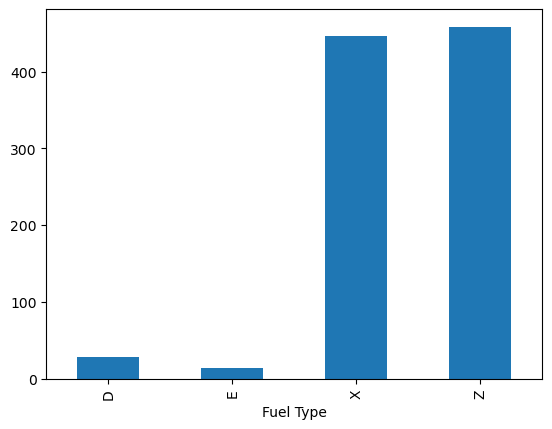

In [61]:
data['Fuel Type'].value_counts().sort_index().plot(kind='bar')
plt.show()

**Distribution of numeric attributes**

In [62]:
data.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


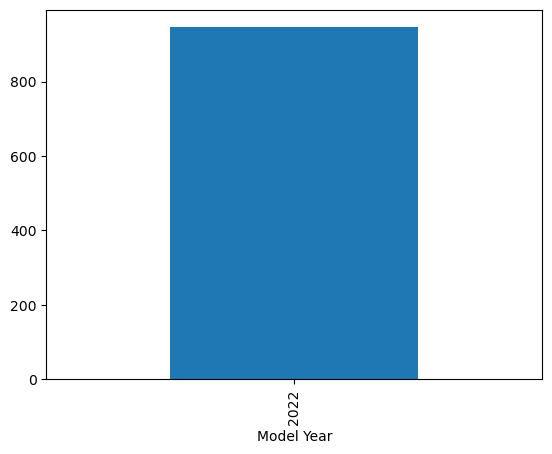

In [63]:
data['Model Year'].value_counts().sort_index().plot(kind='bar')
plt.show()

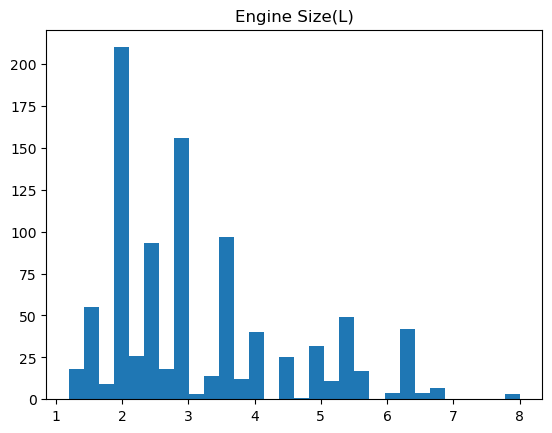

In [64]:
plt.hist(data['Engine Size(L)'], bins=30)
plt.title('Engine Size(L)')
plt.show()

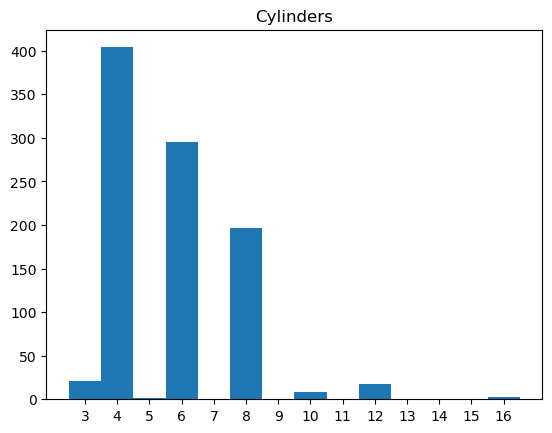

In [65]:
plt.hist(data['Cylinders'], bins=np.arange(min(data['Cylinders']), max(data['Cylinders'])+2, 1)-0.5)
plt.xticks(np.arange(min(data['Cylinders']), max(data['Cylinders'])+1))
plt.title('Cylinders')
plt.show()

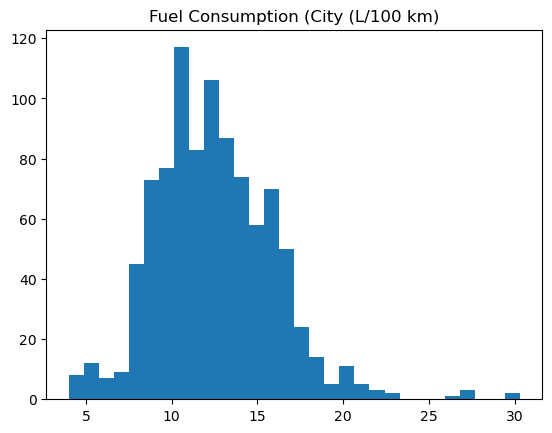

In [66]:
plt.hist(data['Fuel Consumption (City (L/100 km)'], bins=30)
plt.title('Fuel Consumption (City (L/100 km)')
plt.show()

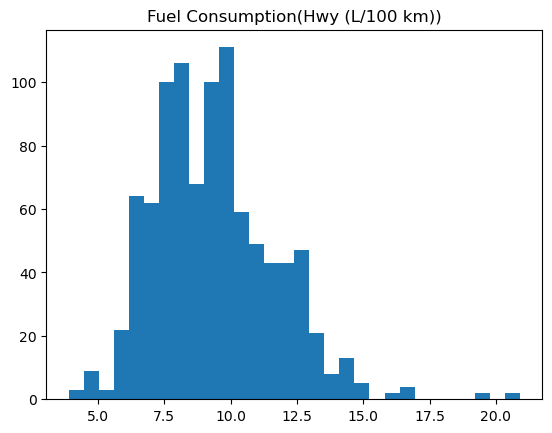

In [67]:
plt.hist(data['Fuel Consumption(Hwy (L/100 km))'], bins=30)
plt.title('Fuel Consumption(Hwy (L/100 km))')
plt.show()

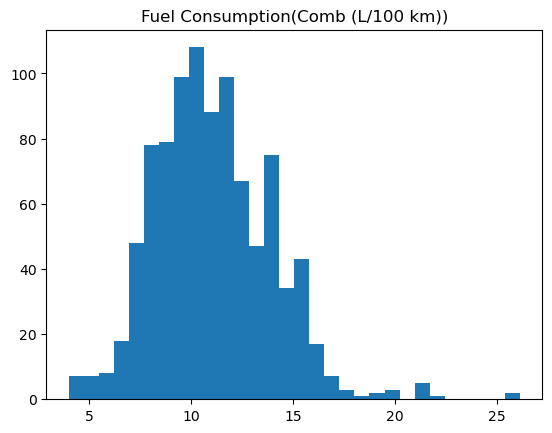

In [68]:
plt.hist(data['Fuel Consumption(Comb (L/100 km))'], bins=30)
plt.title('Fuel Consumption(Comb (L/100 km))')
plt.show()

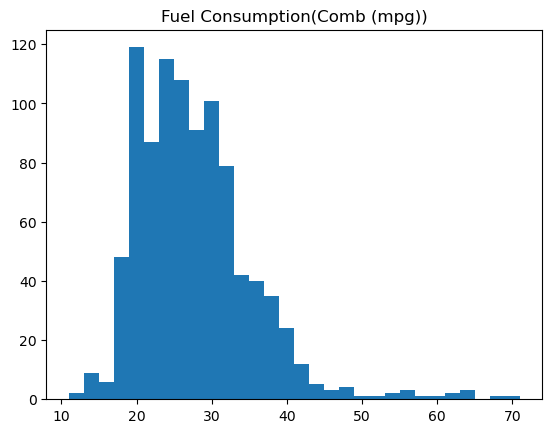

In [69]:
plt.hist(data['Fuel Consumption(Comb (mpg))'], bins=30)
plt.title('Fuel Consumption(Comb (mpg))')
plt.show()

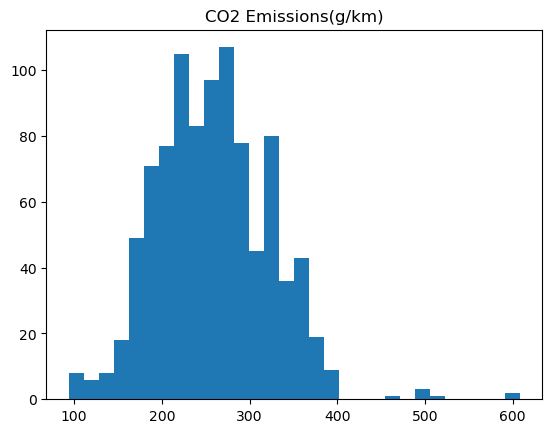

In [70]:
plt.hist(data['CO2 Emissions(g/km)'], bins=30)
plt.title('CO2 Emissions(g/km)')
plt.show()

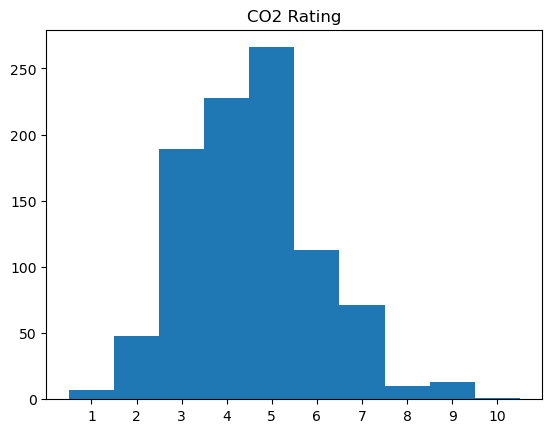

In [71]:
plt.hist(data['CO2 Rating'], bins=np.arange(min(data['CO2 Rating']), max(data['CO2 Rating'])+2, 1)-0.5)
plt.xticks(np.arange(min(data['CO2 Rating']), max(data['CO2 Rating'])+1))
plt.title('CO2 Rating')
plt.show()

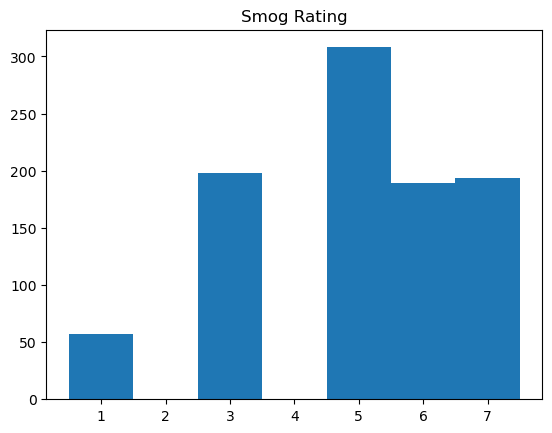

In [72]:
plt.hist(data['Smog Rating'], bins=np.arange(min(data['Smog Rating']), max(data['Smog Rating'])+2, 1)-0.5)
plt.xticks(np.arange(min(data['Smog Rating']), max(data['Smog Rating'])+1))
plt.title('Smog Rating')
plt.show()

**Correlation matrix of numeric features of interest**

We show the matrix that summarizes the correlation coefficients between the predictor variables `Engine Size(L)`, `Cylinders`, `Fuel Consumption (City (L/100 km)`, `Fuel Consumption(Hwy (L/100 km))`, `Fuel Consumption(Comb (L/100 km))` and `Fuel Consumption(Comb (mpg))` and we also include the target variable `CO2 Emissions(g/km)`.

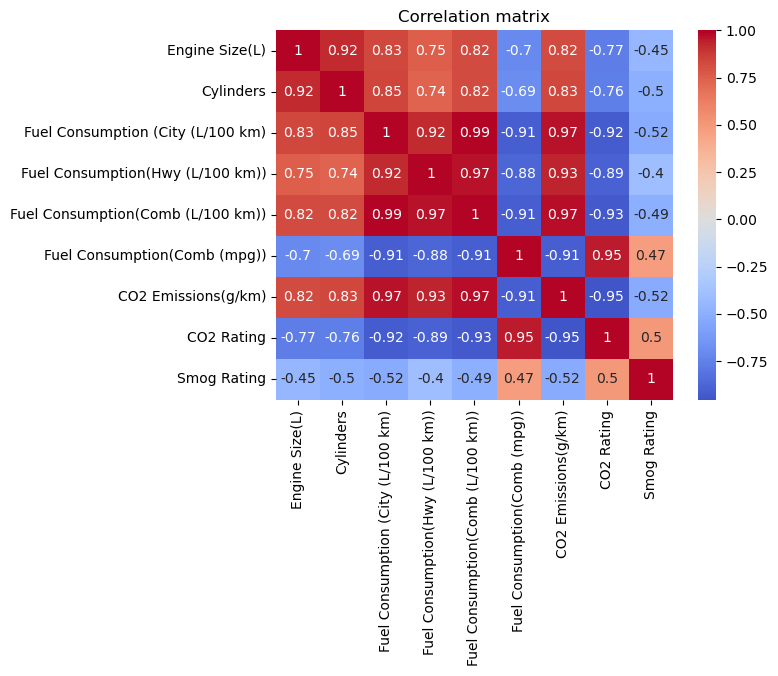

In [73]:
corr_mat = data.drop(['Model Year'],axis=1).corr(numeric_only=True)
sns.heatmap(corr_mat,
            cmap='coolwarm',
            center=0,
            annot=True)
plt.title('Correlation matrix')
plt.show()

There may be multicollinearity problems given the high value of the absolute value of some correlation coefficients between pairs of explanatory variables. Working with all the variables could make it difficult to fit some models if the assumption of independence of the predictor variables is violated, in addition to the inefficiency of including redundant information.

**Feature selection**

We drop some attributes for future analyses:

- `Model Year` is always $2022$ and does not provide useful information.
- There are too many different values for `Model` ($715$) in relation to the number of instances ($946$). Thus, it is difficult for the models to extract particular information associated to each particular model.
- The number of different values for `Make` ($39$), `Vehicle Class` ($14$) and for `Transmission` ($23$) is more reasonable with respect to the size of the dataset, but we will drop them to lower the dimensionality avoiding to one-hot encode them and we will see later that we can still build accurate models.
- `Fuel Consumption (City (L/100 km)` and `Fuel Consumption(Hwy (L/100 km))` are dropped to work with only the combination variable `Fuel Consumption(Comb (L/100 km))` so that we work with a single value of fuel consumption for each vehicle.
- `Fuel Consumption(Comb (mpg))` is just a unit conversion with the same information as the attribute in L/100 km, so it can be dropped.
- We will perform regression with `CO2 Emissions(g/km)` as target, so we will not need the qualitative ratings given by `CO2 Rating`.
- Likewise, `Smog Rating` will not be necessary since we will focus on the prediction of CO<sub>2</sub> emissions.

We could try to fit models for predicting CO<sub>2</sub> emissions taking into account the engine size, the number of cylinders, the fuel type and the fuel consumption of the vehicle.

In [74]:
df = data[['Engine Size(L)','Cylinders','Fuel Type','Fuel Consumption(Comb (L/100 km))','CO2 Emissions(g/km)']]

In [75]:
df

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km)
0,2.4,4,Z,8.6,200
1,3.5,6,Z,11.2,263
2,2.0,4,Z,9.9,232
3,2.0,4,Z,10.3,242
4,2.0,4,Z,9.8,230
...,...,...,...,...,...
941,2.0,4,Z,9.4,219
942,2.0,4,Z,9.4,219
943,2.0,4,Z,9.9,232
944,2.0,4,Z,10.1,236


In [76]:
print('Range of Engine Size(L): [ ' 
      + str(min(df['Engine Size(L)'])) 
      + ' , ' 
      + str(max(df['Engine Size(L)'])) 
      + ' ]')

print('Range of Cylinders: [ ' 
      + str(min(df['Cylinders'])) 
      + ' , ' 
      + str(max(df['Cylinders'])) 
      + ' ]')

print('Fuel Types: ' 
      + str(set(df['Fuel Type'])))

print('Range of Fuel Consumption(Comb (L/100 km)): [ ' 
      + str(min(df['Fuel Consumption(Comb (L/100 km))'])) 
      + ' , ' 
      + str(max(df['Fuel Consumption(Comb (L/100 km))'])) 
      + ' ]')

print('Range of CO2 Emissions(g/km): [ ' 
      + str(min(df['CO2 Emissions(g/km)'])) 
      + ' , ' 
      + str(max(df['CO2 Emissions(g/km)'])) 
      + ' ]')

Range of Engine Size(L): [ 1.2 , 8.0 ]
Range of Cylinders: [ 3 , 16 ]
Fuel Types: {'E', 'Z', 'X', 'D'}
Range of Fuel Consumption(Comb (L/100 km)): [ 4.0 , 26.1 ]
Range of CO2 Emissions(g/km): [ 94 , 608 ]


**Pair plot of numeric features of interest**

We plot the variables `Engine Size(L)`, `Cylinders`, `Fuel Consumption(Comb (L/100 km))` and `CO2 Emissions(g/km)` in pairs.

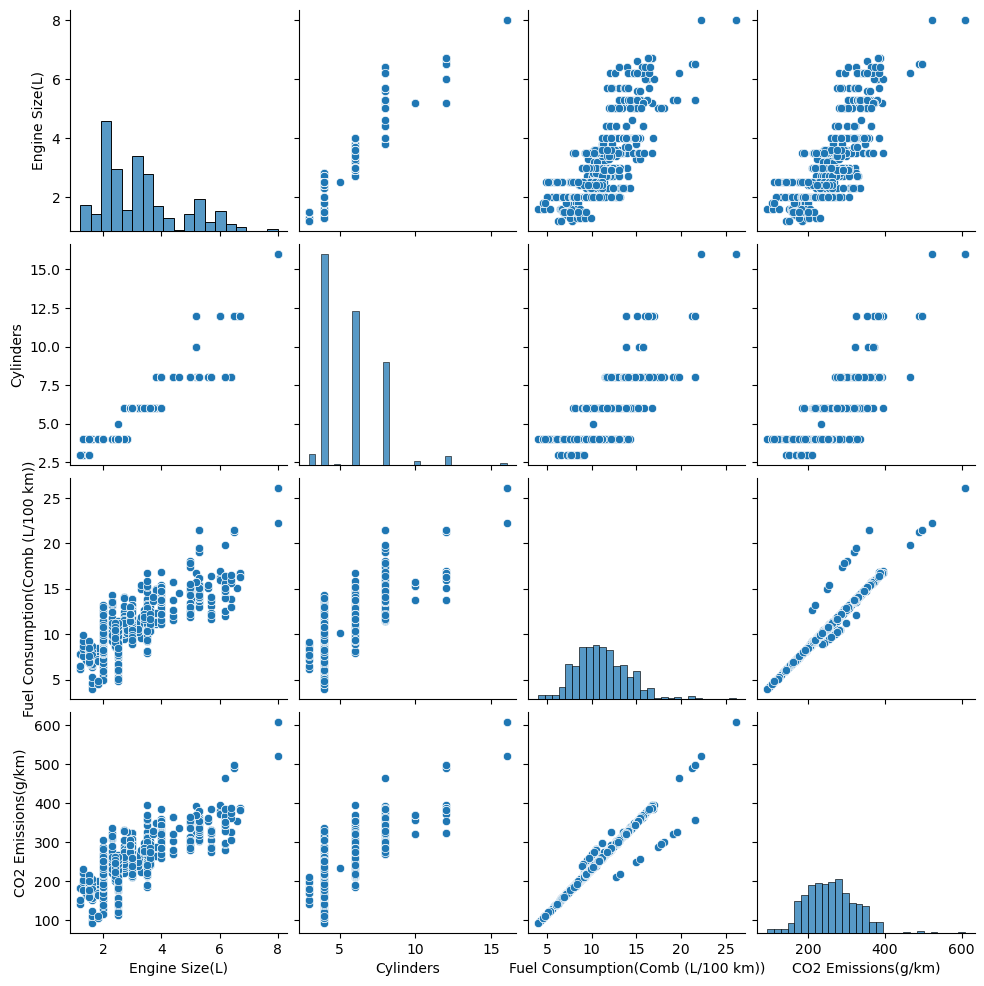

In [77]:
sns.pairplot(data[['Engine Size(L)','Cylinders','Fuel Consumption(Comb (L/100 km))','CO2 Emissions(g/km)']])
plt.show()

**Exploration of dependencies**

Actually, after an exploration of the nature of each variable, we can observe a clear fundamental relationship between CO<sub>2</sub> emission and fuel consumption based on the fuel type. Through this last variable, it is possible to distinguish four strongly linear relationships that are completely separable.

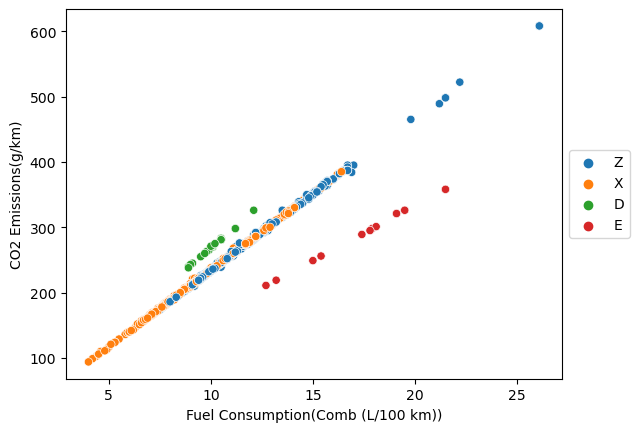

In [78]:
g = sns.scatterplot(x='Fuel Consumption(Comb (L/100 km))',
                    y='CO2 Emissions(g/km)',
                    data=df,
                    hue='Fuel Type')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

---------------------------------------

# Models fitted with one independent variable

According to the specific `Fuel Type`, we fit four simple linear regression models with `Fuel Consumption(Comb (L/100 km))` as independent variable and `CO2 Emissions(g/km)` as dependent variable. Strictly speaking, the corresponding predictions would depend on two attributes, but we do it this way so that each regression is a simple linear regression. We obtain the equation of the line that best fits the points of each fuel type and evaluate the goodness of fit with the coefficient of determination $R^2$.

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$$

### Simple Linear Regression based on Fuel Type Z (premium gasoline)

In [79]:
dfX_ftZ = df[df['Fuel Type']=='Z']['Fuel Consumption(Comb (L/100 km))']
dfy_ftZ = df[df['Fuel Type']=='Z']['CO2 Emissions(g/km)']

dfX_ftZ = dfX_ftZ.values.reshape(-1,1)

LR_model_ftZ = LinearRegression()
LR_model_fitted_ftZ = LR_model_ftZ.fit(dfX_ftZ, dfy_ftZ)

print('There are %d vehicles with fuel type Z' % len(dfX_ftZ))

print('Equation of the line for fuel type Z: y = %+.4fx%+.4f' % (LR_model_fitted_ftZ.coef_[0],
                                                                 LR_model_fitted_ftZ.intercept_))

print('Coefficient of determination: %.4f' % LR_model_fitted_ftZ.score(dfX_ftZ, dfy_ftZ))

There are 458 vehicles with fuel type Z
Equation of the line for fuel type Z: y = +23.3661x+0.4869
Coefficient of determination: 0.9988


Use this model to make predictions of CO<sub>2</sub> emissions in g/km for vehicles with fuel type Z by providing the fuel consumption in L/100 km:

In [80]:
LR_model_ftZ.predict([[10.6]])

array([248.16730754])

### Simple Linear Regression based on Fuel Type X (regular gasoline)

In [81]:
dfX_ftX = df[df['Fuel Type']=='X']['Fuel Consumption(Comb (L/100 km))']
dfy_ftX = df[df['Fuel Type']=='X']['CO2 Emissions(g/km)']

dfX_ftX = dfX_ftX.values.reshape(-1,1)

LR_model_ftX = LinearRegression()
LR_model_fitted_ftX = LR_model_ftX.fit(dfX_ftX, dfy_ftX)

print('There are %d vehicles with fuel type X' % len(dfX_ftX))

print('Equation of the line for fuel type X: y = %+.4fx%+.4f' % (LR_model_fitted_ftX.coef_[0],
                                                                 LR_model_fitted_ftX.intercept_))

print('Coefficient of determination: %.4f' % LR_model_fitted_ftX.score(dfX_ftX, dfy_ftX))

There are 446 vehicles with fuel type X
Equation of the line for fuel type X: y = +23.4571x+0.0801
Coefficient of determination: 0.9996


Use this model to make predictions of CO<sub>2</sub> emissions in g/km for vehicles with fuel type X by providing the fuel consumption in L/100 km:

In [82]:
LR_model_ftX.predict([[10.6]])

array([248.72547477])

### Simple Linear Regression based on Fuel Type D (diesel)

In [83]:
dfX_ftD = df[df['Fuel Type']=='D']['Fuel Consumption(Comb (L/100 km))']
dfy_ftD = df[df['Fuel Type']=='D']['CO2 Emissions(g/km)']

dfX_ftD = dfX_ftD.values.reshape(-1,1)

LR_model_ftD = LinearRegression()
LR_model_fitted_ftD = LR_model_ftD.fit(dfX_ftD, dfy_ftD)

print('There are %d vehicles with fuel type D' % len(dfX_ftD))

print('Equation of the line for fuel type D: y = %+.4fx%+.4f' % (LR_model_fitted_ftD.coef_[0],
                                                                 LR_model_fitted_ftD.intercept_))

print('Coefficient of determination: %.4f' % LR_model_fitted_ftD.score(dfX_ftD, dfy_ftD))

There are 28 vehicles with fuel type D
Equation of the line for fuel type D: y = +26.3700x+4.7631
Coefficient of determination: 0.9959


Use this model to make predictions of CO<sub>2</sub> emissions in g/km for vehicles with fuel type D by providing the fuel consumption in L/100 km:

In [84]:
LR_model_ftD.predict([[10.6]])

array([284.28555842])

### Simple Linear Regression based on Fuel Type E (ethanol E85)

In [85]:
dfX_ftE = df[df['Fuel Type']=='E']['Fuel Consumption(Comb (L/100 km))']
dfy_ftE = df[df['Fuel Type']=='E']['CO2 Emissions(g/km)']

dfX_ftE = dfX_ftE.values.reshape(-1,1)

LR_model_ftE = LinearRegression()
LR_model_fitted_ftE = LR_model_ftE.fit(dfX_ftE, dfy_ftE)

print('There are %d vehicles with fuel type E' % len(dfX_ftE))

print('Equation of the line for fuel type E: y = %+.4fx%+.4f' % (LR_model_fitted_ftE.coef_[0],
                                                                 LR_model_fitted_ftE.intercept_))

print('Coefficient of determination: %.4f' % LR_model_fitted_ftE.score(dfX_ftE, dfy_ftE))

There are 14 vehicles with fuel type E
Equation of the line for fuel type E: y = +16.8761x-3.7287
Coefficient of determination: 0.9993


Use this model to make predictions of CO<sub>2</sub> emissions in g/km for vehicles with fuel type E by providing the fuel consumption in L/100 km:

In [86]:
LR_model_ftE.predict([[10.6]])

array([175.15760451])

-------------------------------------------

# Models fitted with several independent variables

With `CO2 Emissions(g/km)` as the dependent variable, we will train models that include `Fuel Consumption(Comb (L/100 km))` and `Fuel Type` as independent variables and also `Engine Size(L)` and `Cylinders`, if appropriate.

First, to consider `Fuel Type` at the same level as the other variables, we must perform one-hot encoding since it is a categorical variable. There are four fuel types, so we replace the old `Fuel Type` with four variables `Fuel Type_D`, `Fuel Type_E`, `Fuel Type_X` and `Fuel Type_Z`. Depending on the fuel type of each vehicle, the associated dummy variable takes the value $1$ and the others take the value $0$.

In [102]:
dfOHE = pd.get_dummies(df, columns=['Fuel Type'], dtype=int)

dfOHE_X = dfOHE.drop(['CO2 Emissions(g/km)'], axis=1)
dfOHE_y = dfOHE['CO2 Emissions(g/km)']

In [103]:
dfOHE_X

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2.4,4,8.6,0,0,0,1
1,3.5,6,11.2,0,0,0,1
2,2.0,4,9.9,0,0,0,1
3,2.0,4,10.3,0,0,0,1
4,2.0,4,9.8,0,0,0,1
...,...,...,...,...,...,...,...
941,2.0,4,9.4,0,0,0,1
942,2.0,4,9.4,0,0,0,1
943,2.0,4,9.9,0,0,0,1
944,2.0,4,10.1,0,0,0,1


In [104]:
dfOHE_y

0      200
1      263
2      232
3      242
4      230
      ... 
941    219
942    219
943    232
944    236
945    252
Name: CO2 Emissions(g/km), Length: 946, dtype: int64

### Multiple Linear Regression

Linear regression of `CO2 Emissions(g/km)` against `Engine Size(L)`, `Cylinders`, `Fuel Consumption(Comb (L/100 km))` and the four dummy variables associated to `Fuel Type`. See a summary of the regression results.

In [90]:
dfOHE_X = add_constant(dfOHE_X, prepend=False)
MLR_model = OLS(dfOHE_y, dfOHE_X)
MLR_model_fitted = MLR_model.fit()
print(MLR_model_fitted.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 8.577e+04
Date:                 Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                         02:28:36   Log-Likelihood:                -2298.9
No. Observations:                  946   AIC:                             4612.
Df Residuals:                      939   BIC:                             4646.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Even before making predictions, we see some major problems with how the model has been fitted:

- If we look at the magnitude of the coefficients, `Engine Size(L)` and `Cylinders` do not seem to be very significant. A t-test has been carried out for all predictors and the independent term to test the significance of each coefficient. The test statistic is the ratio of the value of the corresponding coefficient to the associated standard error. The null hypothesis is that the corresponding coefficient is zero (statistically not significant) and the alternative hypothesis is that it is not. Indeed, the p-values obtained for `Engine Size(L)` and `Cylinders` are considerably greater than $0.05$, so we do not reject the null hypothesis for them and conclude that they are not significant variables, while the others are. The general trend is that the larger the engine size and the more cylinders, the higher the CO<sub>2</sub> emissions. The problem is that, for a given engine size or for a given number of cylinders, there is a high variability in the amount of CO<sub>2</sub> emitted depending on the vehicle.

- Apart from this problem of not being significant, the variables `Engine Size(L)` and `Cylinders` already showed a very high correlation in the correlation matrix, so it can be a problem to add them simultaneously in the linear model.

Thus, from now on, we remove the variables `Engine Size(L)` and `Cylinders`.

In [91]:
dfOHE = pd.get_dummies(df, columns=['Fuel Type'], dtype=int)

dfOHE_X = dfOHE.drop(['CO2 Emissions(g/km)','Engine Size(L)','Cylinders'], axis=1)
dfOHE_y = dfOHE['CO2 Emissions(g/km)']

In [92]:
dfOHE_X

,Fuel Consumption(Comb (L/100 km)),Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,8.6,0,0,0,1
1,11.2,0,0,0,1
2,9.9,0,0,0,1
3,10.3,0,0,0,1
4,9.8,0,0,0,1
...,...,...,...,...,...
941,9.4,0,0,0,1
942,9.4,0,0,0,1
943,9.9,0,0,0,1
944,10.1,0,0,0,1


In [93]:
dfOHE_y

0      200
1      263
2      232
3      242
4      230
      ... 
941    219
942    219
943    232
944    236
945    252
Name: CO2 Emissions(g/km), Length: 946, dtype: int64

- Having four fuel types, we included all four dummy variables in the model. Obviously, the four columns add up to a column of ones. However, the design matrix already has a column of ones, which is the column associated with the independent term. Therefore, the design matrix is singular and this is a problem when using the ordinary least squares method.

One solution could be to eliminate one of the dummy variables as it is redundant. Nevertheless, in order to obtain coefficients for each specific fuel type, we will fit a Ridge model, which performs linear least squares with L2 regularization.

For a more rigorous evaluation of the performance of the following models, we will perform a train-test split ($70\%$ + $30\%$). The model is trained with $70\%$ of the vehicles ($662$). With these training data, we evaluate the goodness of fit computing the coefficient of determination $R^2$.

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$$

Then, we compute the root mean squared error $RMSE$ comparing the actual test data (CO<sub>2</sub> emissions of the remaining $30\%$ of the vehicles ($284$)) with the predictions of CO<sub>2</sub> emissions on the test data.

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$$

### Ridge Regression

Using $\alpha=1$ as the constant that multiplies the L2 term, we fit a Ridge model. Each predictor gets an associated coefficient.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(dfOHE_X, dfOHE_y, test_size=0.3, random_state=42)

Ridge_model = Ridge()
Ridge_model_fitted = Ridge_model.fit(X_train, y_train)

print('MODEL COEFFICIENTS')
print('Fuel Consumption(Comb (L/100 km)): %.4f' % Ridge_model_fitted.coef_[0])
print('Fuel Type_D: %.4f' % Ridge_model_fitted.coef_[1])
print('Fuel Type_E: %.4f' % Ridge_model_fitted.coef_[2])
print('Fuel Type_X: %.4f' % Ridge_model_fitted.coef_[3])
print('Fuel Type_Z: %.4f' % Ridge_model_fitted.coef_[4])
print('Independent term: %.4f' % Ridge_model_fitted.intercept_)
print('\n')
print('Coefficient of determination (Goodness of fit): %.4f' % Ridge_model_fitted.score(X_train, y_train))
print('Root mean squared error (test data vs. predictions): %.4f' % mean_squared_error(y_test,
                                                                                       Ridge_model_fitted.predict(X_test),
                                                                                       squared=False))

MODEL COEFFICIENTS
Fuel Consumption(Comb (L/100 km)): 23.2400
Fuel Type_D: 49.0166
Fuel Type_E: -82.8616
Fuel Type_X: 17.0648
Fuel Type_Z: 16.7802
Independent term: -14.8351


Coefficient of determination (Goodness of fit): 0.9981
Root mean squared error (test data vs. predictions): 4.8253


Using the Ridge model, obtain an estimation of the CO<sub>2</sub> emissions in g/km of a vehicle by entering its fuel consumption in L/100 km and its fuel type (write $1$ in the corresponding type and $0$ in the others):

In [95]:
Ridge_model_fitted.predict(pd.DataFrame({'Fuel Consumption(Comb (L/100 km))': [10.6] ,
                                         'Fuel Type_D': [1] ,
                                         'Fuel Type_E': [0] ,
                                         'Fuel Type_X': [0] ,
                                         'Fuel Type_Z': [0] }))

array([280.52506999])

### Decision Tree Regression

For the decision tree model, we will specify a maximum depth of $6$. It produces acceptable error which will decrease very slowly for greater depths and we want to try to avoid overfitting.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(dfOHE_X, dfOHE_y, test_size=0.3, random_state=42)

DT_model = DecisionTreeRegressor(max_depth=6, random_state=1234)   
DT_model_fitted = DT_model.fit(X_train, y_train)

print('Coefficient of determination (Goodness of fit): %.4f' % DT_model_fitted.score(X_train, y_train))
print('Root mean squared error (test data vs. predictions): %.4f' % mean_squared_error(y_test,
                                                                                       DT_model_fitted.predict(X_test),
                                                                                       squared=False))

Coefficient of determination (Goodness of fit): 0.9974
Root mean squared error (test data vs. predictions): 12.2955


Using the decision tree model, obtain an estimation of the CO<sub>2</sub> emissions in g/km of a vehicle by entering its fuel consumption in L/100 km and its fuel type (write $1$ in the corresponding type and $0$ in the others):

In [97]:
DT_model_fitted.predict(pd.DataFrame({'Fuel Consumption(Comb (L/100 km))': [10.6] ,
                                      'Fuel Type_D': [1] ,
                                      'Fuel Type_E': [0] ,
                                      'Fuel Type_X': [0] ,
                                      'Fuel Type_Z': [0] }))

array([281.66666667])

### Random Forest Regression

For the random forest model, we will use $100$ estimators (trees in the forest), which is a standard amount that produces an acceptable error. As in the case of the decision tree, we will specify a maximum depth of $6$.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(dfOHE_X, dfOHE_y, test_size=0.3, random_state=42)

RF_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=1234)   
RF_model_fitted = RF_model.fit(X_train, y_train)

print('Coefficient of determination (Goodness of fit): %.4f' % RF_model_fitted.score(X_train, y_train))
print('Root mean squared error (test data vs. predictions): %.4f' % mean_squared_error(y_test,
                                                                                       RF_model_fitted.predict(X_test),
                                                                                       squared=False))

Coefficient of determination (Goodness of fit): 0.9977
Root mean squared error (test data vs. predictions): 11.5178


Using the random forest model, obtain an estimation of the CO<sub>2</sub> emissions in g/km of a vehicle by entering its fuel consumption in L/100 km and its fuel type (write $1$ in the corresponding type and $0$ in the others):

In [99]:
RF_model_fitted.predict(pd.DataFrame({'Fuel Consumption(Comb (L/100 km))': [10.6] ,
                                      'Fuel Type_D': [1] ,
                                      'Fuel Type_E': [0] ,
                                      'Fuel Type_X': [0] ,
                                      'Fuel Type_Z': [0] }))

array([281.40076046])

### Extreme Gradient Boosting Regression

For the extreme gradient boosting model, we will keep the $100$ estimators and the maximum depth of $6$. A suitable learning rate could be $0.05$.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(dfOHE_X, dfOHE_y, test_size=0.3, random_state=42)

XGB_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.05, random_state=1234)   
XGB_model_fitted = XGB_model.fit(X_train, y_train)

print('Coefficient of determination (Goodness of fit): %.4f' % XGB_model_fitted.score(X_train, y_train))
print('Root mean squared error (test data vs. predictions): %.4f' % mean_squared_error(y_test,
                                                                                       XGB_model_fitted.predict(X_test),
                                                                                       squared=False))

Coefficient of determination (Goodness of fit): 0.9980
Root mean squared error (test data vs. predictions): 8.7999


Using the extreme gradient boosting model, obtain an estimation of the CO<sub>2</sub> emissions in g/km of a vehicle by entering its fuel consumption in L/100 km and its fuel type (write $1$ in the corresponding type and $0$ in the others):

In [101]:
XGB_model_fitted.predict(pd.DataFrame({'Fuel Consumption(Comb (L/100 km))': [10.6] ,
                                       'Fuel Type_D': [1] ,
                                       'Fuel Type_E': [0] ,
                                       'Fuel Type_X': [0] ,
                                       'Fuel Type_Z': [0] }))

array([279.13892], dtype=float32)

-------------------------------------------

# Conclusion

In this analysis, we have studied regression models to predict the CO<sub>2</sub> emissions of vehicles. It is necessary to make a selection of variables before fitting the models. It has been determined that two key variables are the fuel consumption and the fuel type. First, linear regression models of CO<sub>2</sub> emissions as a function of fuel consumption can be fitted for each of the fuel types, as they exhibit clearly differentiated linear behaviors. This is a very intuitive and possibly very effective approach given the strongly linear relationships that have been found. However, to consider the four trends in a single model, a Ridge regression model has been fitted. Then, several tree-based models have been fitted: a decision tree regression model, a random forest regression model and an extreme gradient boosting regression model. For each model, we have shown the coefficient of determination to assess the goodness of fit with the training data and the mean squared error to assess the average deviation of the predictions with respect to the test set. On average, all models appear to provide predictions with acceptable error. However, given the structure of the dataset, it appears that the Ridge model is sufficient to capture the differences that exist between the trends followed by each of the fuel types. Tree-based models also perform well (the XGB model outperforms the random forest, which in turn outperforms the decision tree), but may sometimes produce some predictions with more deviation.